<h1 align="center">Scientific Programming in Python</h1>
<h2 align="center">Proyecto Cellular Automaton: Conway`s Game of Life  </h2> 


_Notebook created by Felipe Mancilla S - `felipe.mancilla@alumnos.usm.cl` - DI UTFSM - Julio 2017._

In [3]:
import numba
from scipy.sparse import rand
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ipywidgets import interact
from ipywidgets import fixed
%load_ext line_profiler

<div id='obj' />
# 1. Introducción


El juego de la vida es un ejemplo bien conocido del "autómata celular", que consiste en un modelo matematico para un sistema dinamico que evoluciona en pasos discretos. Tiene bastantes aplicaciones en el campo, tan diversos como en Biología o en Economía.
Es publicado por Conway durante el año 1970, y consiste en un juego de cero jugadores, donde la evolución de un conjunto llamado "celulas" esta determinada desde su estado inicial y no necesita ninguna entrada de datos posterior. Las reglas de este juego son las siguientes:

1. El tablero es una arreglo bidimensional, donde cada grilla representa una celula en dos estados: viva o muerta. 
2. Cada célula tiene ocho células vecinas: se cuentan también las de las diagonales.
3. En cada generación evolutiva de celulas, cada celula pasa lo sgte:

* __Sobrepoblación__: Si una célula viva es rodeada por más de tres células vivas, muere.
* __Estasis__: Si una célula viva es rodeada por dos o tres células vivas, sobrevive.
* __Subpoblación__: Si una célula viva es rodeada por menos de dos células vivas, muere.
* __Reproduction__: Si una célula muerta es rodeada por exáctamente tres células vivas, esta se vuelve una célula viva.

<div id='obj' />
# 2. Desarrollo

Para comenzar con la implementación, se codifican las funciones __vecindario__ y __evolución__

In [4]:
def vecindario(grilla, tablero):

    fila = tablero[0].shape[0]
    columna = tablero.shape[0]
    x_centro, y_centro = grilla

    #Busca los indices de los puntos del centro.
    
    x_izq  = x_centro-1 if x_centro-1 >= 0 else fila-1
    x_der = x_centro+1 if x_centro+1 < fila else 0
    y_arriba    = y_centro-1 if y_centro-1 >= 0 else columna-1
    y_abajo  = y_centro+1 if y_centro+1 < columna else 0
    
    #Devuelve una lista con los valores de las celulas vecinas.
    
    resultado = [tablero[y_arriba][x_izq],
                tablero[y_arriba][x_centro],
                tablero[y_arriba][x_der],
                tablero[y_centro][x_izq],
                tablero[y_centro][x_der],
                tablero[y_abajo][x_izq],
                tablero[y_abajo][x_centro],
                tablero[y_abajo][x_der]]

    return resultado

def evolucion(tablero):
    
    fila = tablero[0].shape[0]
    columna = tablero.shape[0]
    
    #Se crea un nuevo tablero para guardar la evolución
    nuevoTablero = np.zeros((fila, columna), dtype=int) 
    
    for x in range(fila):
        for y in range(columna):
            #Se toma el valor del centro.
            valor = tablero[y][x]  
            #Busqueda de vecinos del centro determinado.
            arreglo = vecindario((x, y), tablero)
            #Cantidad de celulas vivas (vivas=1)
            suma = arreglo.count(1)
            
            #Chequea la sobrevivencia de una celula por las reglas.
            if (valor == 0 and suma == 3) or \
               (valor == 1 and suma in (2, 3)):
                nuevoTablero[y][x] = 1
            else:
                nuevoTablero[y][x] = 0
    return nuevoTablero

Una vez creadas, se hace una función que controla la cantidad de "__Generaciones__"

In [5]:
def func(gen=0,tablero=None):
    for i in range(gen):
        tablero = evolucion(tablero)
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.axis('off')
    imagen = ax.imshow(tablero, interpolation="none", cmap=cm.gray_r)
    plt.show()

Ahora se daran parametros para comenzar el algoritmo.

In [6]:
# Parámetros iniciales
Generaciones = 100
Fila = 10
Columna = 10

Usando la libreria de __scipy.sparse__, se hace llamado a una función __rand()__ que nos entregara una arreglo bidimensional (matriz) densa de 1's y 0's, dependiendo del valor de __density__, varia el valor de 1's en el arreglo.

In [9]:
b = rand(Fila, Columna, density=0.5, format='csr')
b.data[:] = 1
print("Matriz inicial \n",b.A)
tabla = np.copy(b.A)

Matriz inicial 
 [[ 0.  0.  0.  1.  0.  0.  1.  0.  0.  1.]
 [ 1.  1.  0.  1.  1.  0.  1.  1.  0.  0.]
 [ 0.  1.  0.  1.  1.  1.  1.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  1.  1.  0.  1.  1.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  1.  1.  1.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.  1.  1.  1.  1.]
 [ 0.  0.  1.  0.  1.  0.  0.  0.  0.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  0.  1.  1.  0.  0.  1.]]


Y finalmente, usando la función __interact()__ manejamos la cantidad de generaciones y mostramos por pantalla, la siguiente evolución de celulas.

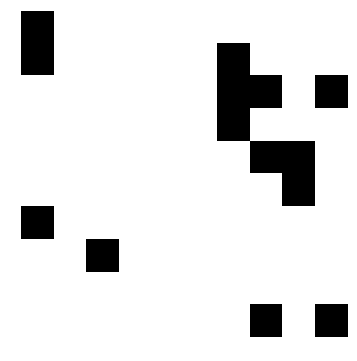

In [10]:
interact(func, gen=(0,Generaciones),tablero=fixed(tabla));

#  Profiling

Para mejorar el tiempo de ejecución del algoritmo, se trabaja con parametros muy grandes.

In [11]:
# Parámetros iniciales
Generaciones = 100
Fila = 1000
Columna = 1000

b = rand(Fila, Columna, density=0.5, format='csr')
b.data[:] = 1
x = np.copy(b.A)

Se tomara el tiempo para revisar cuanto se demora en hacer __100__ generaciones.

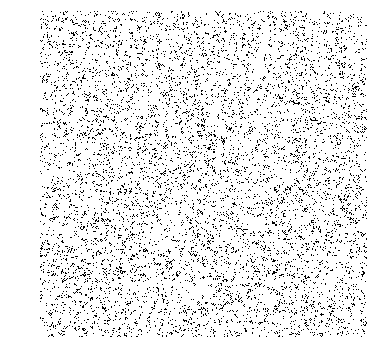

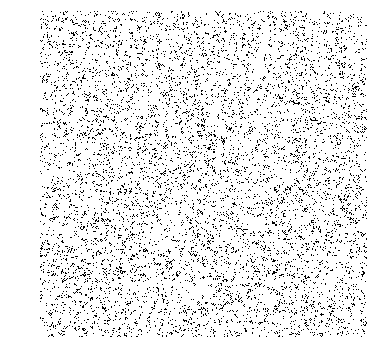

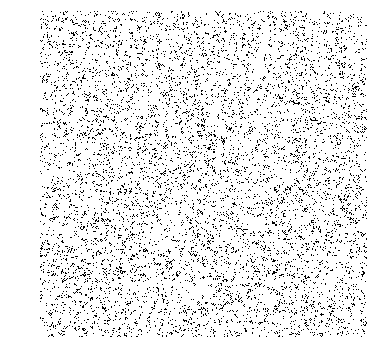

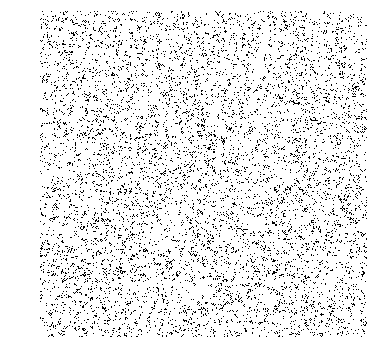

1 loop, best of 3: 9min 35s per loop


In [12]:
t1= %timeit -o func(Generaciones,x)

Para ver donde se genera la función con mayor tiempo, usaremos las celdas magicas __prun__ y __lprun__

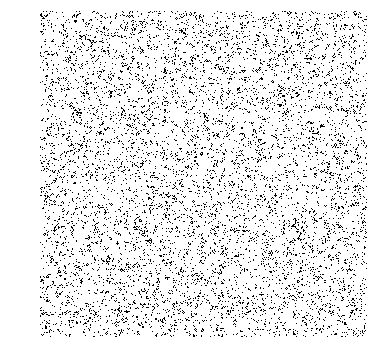

 
*** Profile printout saved to text file 'prun_function'. 


In [9]:
%%prun -s cumulative -q -l 15 -T prun_function
func(Generaciones,x)

In [10]:
print(open('prun_function', 'r').read())

         200089626 function calls (200088340 primitive calls) in 607.935 seconds

   Ordered by: cumulative time
   List reduced from 1012 to 15 due to restriction <15>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000  607.935  607.935 {built-in method builtins.exec}
        1    0.000    0.000  607.935  607.935 <string>:2(<module>)
        1    0.000    0.000  607.935  607.935 <ipython-input-3-158f7a9393a2>:1(func)
      100  168.590    1.686  607.681    6.077 <ipython-input-2-e70ac1bf2bbc>:27(evolucion)
100000000  334.813    0.000  334.813    0.000 <ipython-input-2-e70ac1bf2bbc>:1(vecindario)
100000001  104.190    0.000  104.190    0.000 {method 'count' of 'list' objects}
        1    0.000    0.000    0.179    0.179 pyplot.py:236(show)
        1    0.000    0.000    0.179    0.179 backend_inline.py:18(show)
        1    0.000    0.000    0.178    0.178 display.py:124(display)
        1    0.000    0.000    0.176    0.176 formatters

Se puede observar de que la función que genera mas tiempo de ejecución por cantidad de llamados, es __vecindario()__.
Por lo tanto con __lprun__ se ve, de forma mas especifica, donde puede existir el mayor tiempo.

In [15]:
%lprun -T lprof01 -f vecindario func(Generaciones,x)

*** KeyboardInterrupt exception caught in code being profiled.
*** Profile printout saved to text file 'lprof01'. *** KeyboardInterrupt exception caught in code being profiled.


In [16]:
print(open('lprof01', 'r').read())

Timer unit: 1e-06 s

Total time: 575.554 s
File: <ipython-input-2-e70ac1bf2bbc>
Function: vecindario at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def vecindario(grilla, tablero):
     2                                           
     3  47486698     43436249      0.9      7.5      fila = tablero[0].shape[0]
     4  47486698     30970321      0.7      5.4      columna = tablero.shape[0]
     5  47486698     25113791      0.5      4.4      x_centro, y_centro = grilla
     6                                           
     7                                               #Busca los indices de los puntos del centro.
     8                                               
     9  47486698     36783870      0.8      6.4      x_izq  = x_centro-1 if x_centro-1 >= 0 else fila-1
    10  47486697     35019617      0.7      6.1      x_der = x_centro+1 if x_centro+1 < fila else 0
    11  47486697     34180209      0.7      5.

Ya teniendo los datos analizados, pasamos a mejorar el codigo, usando la libreia __numba__.

In [13]:
@numba.jit(nopython=True)
def vecindario_numba(grilla, tablero):
    
    fila = tablero[0].shape[0]
    columna = tablero.shape[0]
    x_centro, y_centro = grilla

    x_izq  = x_centro-1 if x_centro-1 >= 0 else fila-1
    x_der = x_centro+1 if x_centro+1 < fila else 0
    y_arriba = y_centro-1 if y_centro-1 >= 0 else columna-1
    y_abajo  = y_centro+1 if y_centro+1 < columna else 0
    
    resultado = [tablero[y_arriba][x_izq],
            tablero[y_arriba][x_centro],
            tablero[y_arriba][x_der],
            tablero[y_centro][x_izq],
            tablero[y_centro][x_der],
            tablero[y_abajo][x_izq],
            tablero[y_abajo][x_centro],
            tablero[y_abajo][x_der]]

    return resultado

@numba.jit(nopython=True)
def evolucion_numba(tablero):

    fila = tablero[0].shape[0]
    columna = tablero.shape[0]
    nuevoTablero = np.empty((fila,columna))
    
    for x in range(fila):
        for y in range(columna):
            valor = tablero[y][x]
            arreglo = vecindario_numba((x, y), tablero)
            suma = arreglo.count(1)
            if (valor == 0 and suma == 3) or \
               (valor == 1 and suma in (2, 3)):
                nuevoTablero[y][x] = 1
            else:
                nuevoTablero[y][x] = 0
    return nuevoTablero


def func(gen,tablero):
    
    for i in range(gen):
        tablero = evolucion_numba(tablero)
        
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(111)
    ax.axis('off')
    imagen = ax.imshow(tablero, interpolation="none", cmap=cm.gray_r)
    plt.show()

Finalmente, sacamos el tiempo de ejecución

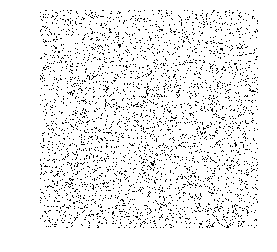

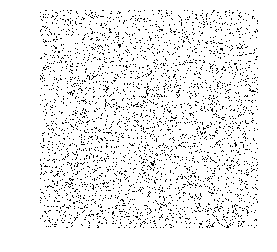

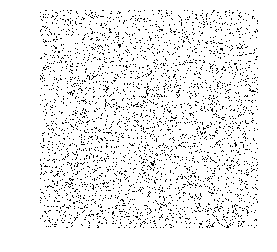

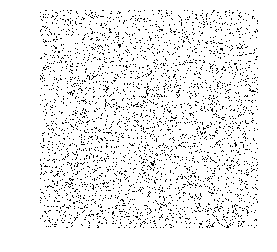

1 loop, best of 3: 24.7 s per loop


In [14]:
t2 = %timeit -o func(Generaciones,x)

Y hacemos la comparación.

In [15]:
print("Tiempo Mejorado: {0}".format(t1.best/t2.best))

Tiempo Mejorado: 23.301411972328832


<div id='obj' />
# 3. Conclusiones

En base a los experimentos realizados, se concluye que dependiendo de la distribuccion de 1's en la matriz, es donde la cantidad de celulas vivas podran sobrevivir en cada evolución, ya que al probar con matriz de 1's menos densa, las celulas vivas no sobreviven despues de la 30° generación. Además la libreria __numba__ nos entrega un camino mucho mas sencillo para optimizar el codigo (siendo de otra forma, aplicando __cython__ o paralelismo), por lo que es una libreria demasiado util, como tambien, la libreria de __matplotlib__ que nos entrega funciones intuitivas para graficar los experimentos y de esa manera complementar las argumentaciones que se hayan hecho en este proyecto.
Finalmente, usando varias herramientas aprendidas en el curso (como scipy.sparse, numba, etc) se logro aprender un nuevo conocimiento que relaciona la matemática con python, donde sera fundamental conocerlo para materias que son muy requeridas, como Computación Científica I y II.